In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('C:\\Users\\user\\Downloads\\Concrete_Data.xls')

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
data.columns = ['Cement',
       'Blast_Furnace_Slag',
       'Fly_Ash',
       'Water',
       'Superplasticizer',
       'Coarse_Aggregate',
       'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength']

In [5]:
data.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast_Furnace_Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine_Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete_compressive_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


K-Fold Analysis

Fold1
=-=-=-=-=-=-
MSE: 287.97428406007975
MAE: 59.80623380611242
R2-Score: -6.544360938538606
*************
Fold2
=-=-=-=-=-=-
MSE: 244.62785607086488
MAE: 61.99554873581114
R2-Score: -1.8368474759376037
*************
Fold3
=-=-=-=-=-=-
MSE: 165.87436533828267
MAE: 70.91114849929967
R2-Score: -0.980928045379676
*************


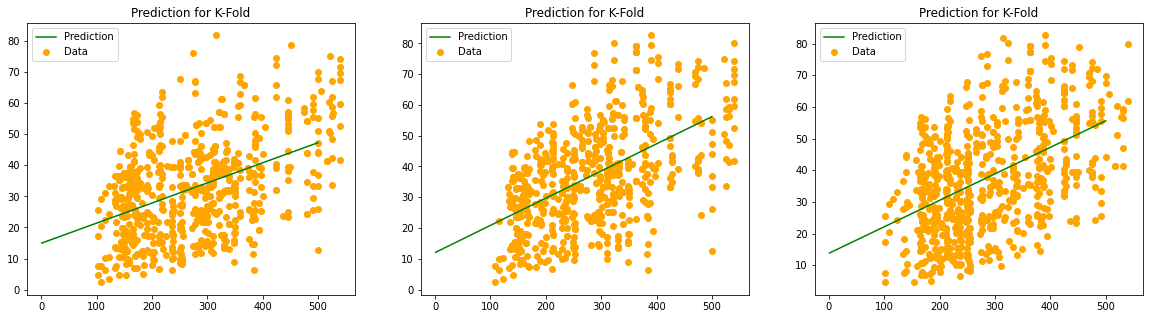

In [6]:
from sklearn.model_selection import KFold
X = data[['Cement']]
Y = data[['Concrete_compressive_strength']]
Xtrain, Ytrain, Xtest, Ytest = train_test_split(X, Y, test_size= 0.2, random_state= 0)

line = np.linspace(1,500,1000).reshape(-1,1)
fig, axes = plt.subplots(1,3, figsize=(20,5))
low = 0
up = data.shape[0]
folds = KFold(n_splits= 3)
fold = 0
for splits, ax in zip(folds.split(range(low, up)), axes):
    x = X.iloc[splits[0]]
    y  = Y.iloc[splits[0]]

    xt = X.iloc[splits[1]]
    yt = Y.iloc[splits[1]]
    model = LinearRegression()
    model.fit(x,y)
    yhat= model.predict(xt.values)
    fold += 1
    print(f'Fold{fold}')
    print('=-=-=-=-=-=-')
    print('MSE:', mean_squared_error(yhat,yt))
    print('MAE:',100- mean_absolute_percentage_error(yhat, yt)*100)
    print('R2-Score:', r2_score(yhat, yt))
    print('*************')
    
    ax.scatter(x.values, y, c= 'orange', label= 'Data')
    ax.plot(line,model.predict(line), c = 'green', label = 'Prediction')
    ax.legend()
    ax.set_title('Prediction for K-Fold')




Fold1
=-=-=-=-=-=-
MSE: 344.6430973718198
MAE: 57.69775309853035
R2-Score: -4.915387171398943
*************
Fold2
=-=-=-=-=-=-
MSE: 254.88896893359802
MAE: 62.679455938438274
R2-Score: -12.131434741406803
*************
Fold3
=-=-=-=-=-=-
MSE: 201.26136350073168
MAE: 68.50792202049652
R2-Score: -12.762601271987775
*************


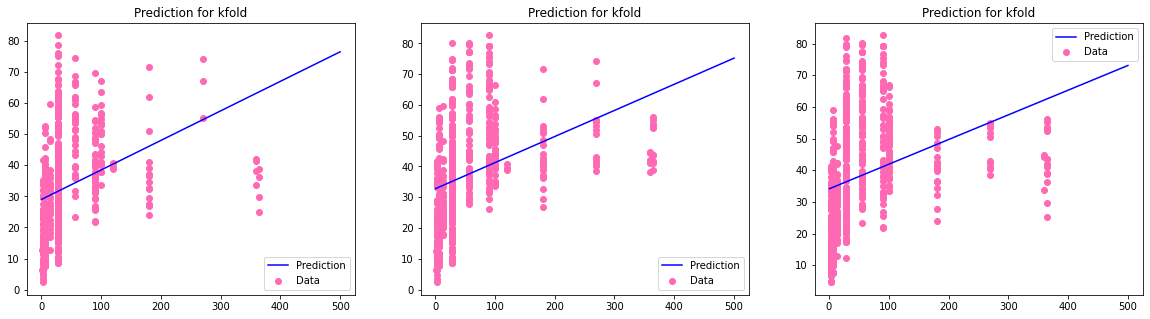

In [7]:
X = data[['Age']]
Y = data[['Concrete_compressive_strength']]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
xtrain,Ytrain,Xtest,ytest = train_test_split(X, Y, test_size=0.2, random_state= 0)

line = np.linspace(1,500,800).reshape(-1,1)
fig, ax = plt.subplots(1,3, figsize=(20,5))
low = 0
up = data.shape[0]
folds = KFold(n_splits= 3)
fold = 0
for splits, ax in zip(folds.split(range(low,up)), ax):
    x = X.iloc[splits[0]]
    y = Y.iloc[splits[0]]

    xt = X.iloc[splits[1]]
    yt = Y.iloc[splits[1]]

    kfold_model = LinearRegression()
    kfold_model.fit(x,y)
    yhat = kfold_model.predict(xt.values)
    fold += 1
    print(f'Fold{fold}')
    print('=-=-=-=-=-=-')
    print('MSE:', mean_squared_error(yhat,yt))
    print('MAE:',100- mean_absolute_percentage_error(yhat, yt)*100)
    print('R2-Score:', r2_score(yhat, yt))
    print('*************')

    ax.scatter(x.values, y.values, c= 'hotpink', label ='Data')
    ax.plot(line, kfold_model.predict(line), c = 'blue', label = 'Prediction')
    ax.legend()
    ax.set_title('Prediction for kfold')




Fold1
=-=-=-=-=-=-
MSE: 313.2689383400828
MAE: 58.600408421763966
R2-Score: -8.926331090250159
*************
Fold2
=-=-=-=-=-=-
MSE: 218.43314437093838
MAE: 65.22236842415684
R2-Score: -13.427788914095306
*************
Fold3
=-=-=-=-=-=-
MSE: 260.77561375979127
MAE: 63.42074664084842
R2-Score: -4.6896064525091505
*************


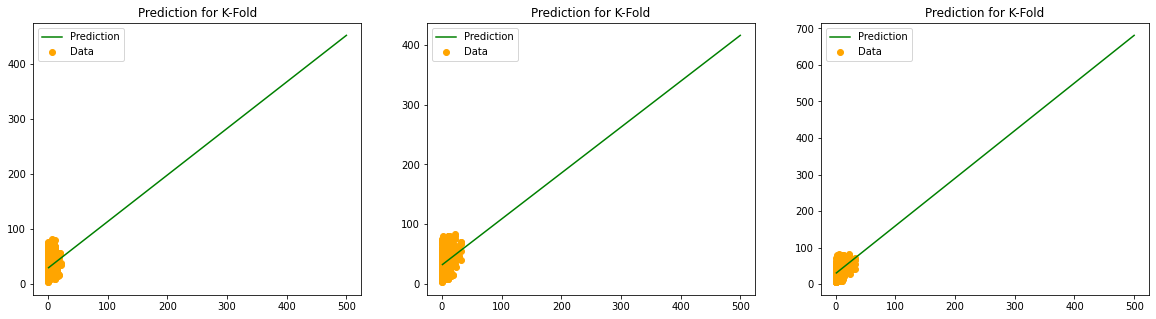

In [8]:
from sklearn.model_selection import KFold
X = data[['Superplasticizer']]
Y = data[['Concrete_compressive_strength']]
Xtrain, Ytrain, Xtest, Ytest = train_test_split(X, Y, test_size= 0.2, random_state= 0)

line = np.linspace(1,500,1000).reshape(-1,1)
fig, axes = plt.subplots(1,3, figsize=(20,5))
low = 0
up = data.shape[0]
folds = KFold(n_splits= 3)
fold = 0
for splits, ax in zip(folds.split(range(low, up)), axes):
    x = X.iloc[splits[0]]
    y  = Y.iloc[splits[0]]

    xt = X.iloc[splits[1]]
    yt = Y.iloc[splits[1]]
    model = LinearRegression()
    model.fit(x,y)
    yhat= model.predict(xt.values)
    fold += 1
    print(f'Fold{fold}')
    print('=-=-=-=-=-=-')
    print('MSE:', mean_squared_error(yhat,yt))
    print('MAE:',100- mean_absolute_percentage_error(yhat, yt)*100)
    print('R2-Score:', r2_score(yhat, yt))
    print('*************')
    
    ax.scatter(x.values, y, c= 'orange', label= 'Data')
    ax.plot(line,model.predict(line), c = 'green', label = 'Prediction')
    ax.legend()
    ax.set_title('Prediction for K-Fold')




KNN Analysis

=-=-=-k=7=-=-=
MSE: 230.29700980803096
MAE: 67.5863311676751
R2_Score: -2.466060879816281


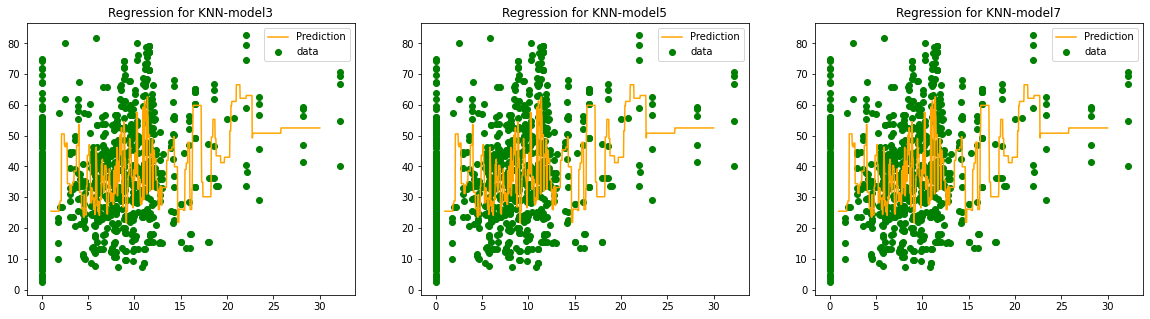

In [9]:
from sklearn.neighbors import KNeighborsRegressor
X = data[['Superplasticizer']]
Y = data[['Concrete_compressive_strength']]
line = np.linspace(1,30, 1000).reshape(-1,1)
fig, axes = plt.subplots(1,3, figsize =(20,5))
ks = [3,5,7]
for k , ax in zip(ks, axes):
    model = KNeighborsRegressor() #n_neighbors=k)
    model.fit(X.values, Y.values)
    yhat= model.predict(X.values)

    ax.scatter(X.values, Y.values, c = 'green', label = 'data')
    ax.plot(line, model.predict(line), c = 'orange', label = 'Prediction')
    ax.legend()
    ax.set_title(f'Regression for KNN-model{k}')
print(f'=-=-=-k={k}=-=-=')
print('MSE:', mean_squared_error(yhat, Y.values))
print('MAE:', 100- mean_absolute_percentage_error(yhat, Y.values)*100)
print('R2_Score:', r2_score(yhat, Y.values))

=-=-=-k=7=-=-=
MSE: 147.22230517228076
MAE: 70.38225837285054
R2_Score: 0.06687958099021307


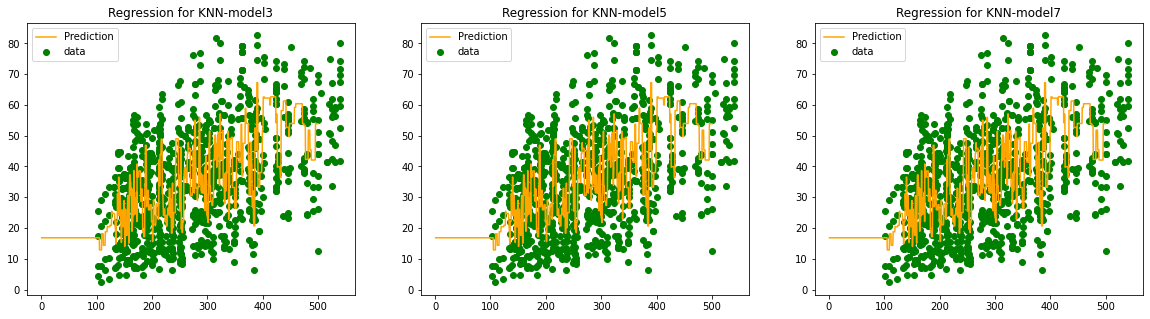

In [10]:

X = data[['Cement']]
Y = data[['Concrete_compressive_strength']]
line = np.linspace(1,500, 1000).reshape(-1,1)
fig, axes = plt.subplots(1,3, figsize =(20,5))
ks = [3,5,7]
for k , ax in zip(ks, axes):
    model = KNeighborsRegressor() #n_neighbors=k)
    model.fit(X.values, Y.values)
    yhat= model.predict(X.values)

    ax.scatter(X.values, Y.values, c = 'green', label = 'data')
    ax.plot(line, model.predict(line), c = 'orange', label = 'Prediction')
    ax.legend()
    ax.set_title(f'Regression for KNN-model{k}')
print(f'=-=-=-k={k}=-=-=')
print('MSE:', mean_squared_error(yhat, Y.values))
print('MAE:', 100- mean_absolute_percentage_error(yhat, Y.values)*100)
print('R2_Score:', r2_score(yhat, Y.values))

=-=-=-k=3=-=-=
MSE: 205.6305184592521
MAE: 62.25356088708894
R2_Score: -0.3937910472201811
=-=-=-k=9=-=-=
MSE: 205.6305184592521
MAE: 62.25356088708894
R2_Score: -0.3937910472201811
=-=-=-k=7=-=-=
MSE: 205.6305184592521
MAE: 62.25356088708894
R2_Score: -0.3937910472201811
=-=-=-k=5=-=-=
MSE: 205.6305184592521
MAE: 62.25356088708894
R2_Score: -0.3937910472201811


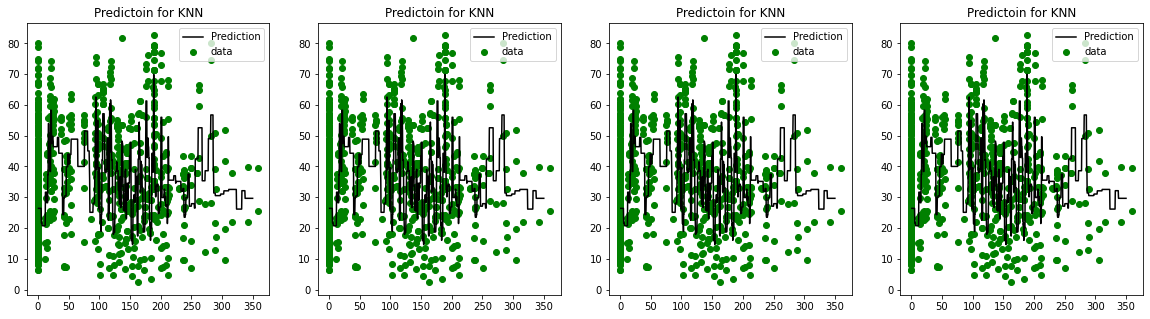

In [19]:
X = data[['Blast_Furnace_Slag']]
Y = data[['Concrete_compressive_strength']]
#xtrain, xtest, ytrain,ytest = train_test_split(X,Y, test_size=0.2, random_state=0)
from sklearn.neighbors import KNeighborsRegressor
ks = [3,9,7,5]
line = np.linspace(1,350,800).reshape(-1,1)
fig, axes = plt.subplots(1,4, figsize=(20,5))
for k , axes in zip(ks, axes):
    knn_model = KNeighborsRegressor()
    knn_model.fit(X,Y)
    yhat = knn_model.predict(X.values)
    print(f'=-=-=-k={k}=-=-=')
    print('MSE:', mean_squared_error(yhat, Y.values))
    print('MAE:', 100- mean_absolute_percentage_error(yhat, Y.values)*100)
    print('R2_Score:', r2_score(yhat, Y.values))

    axes.scatter(X.values,Y.values, c= 'green', label ='data')
    axes.plot(line, knn_model.predict(line), c = 'black', label='Prediction')
    axes.legend()
    axes.set_title('Predictoin for KNN')



Decision TRee

MSE: 229.34407098247001
MAE: 64.66163676255859
R2_Score: -3.6365205155342046


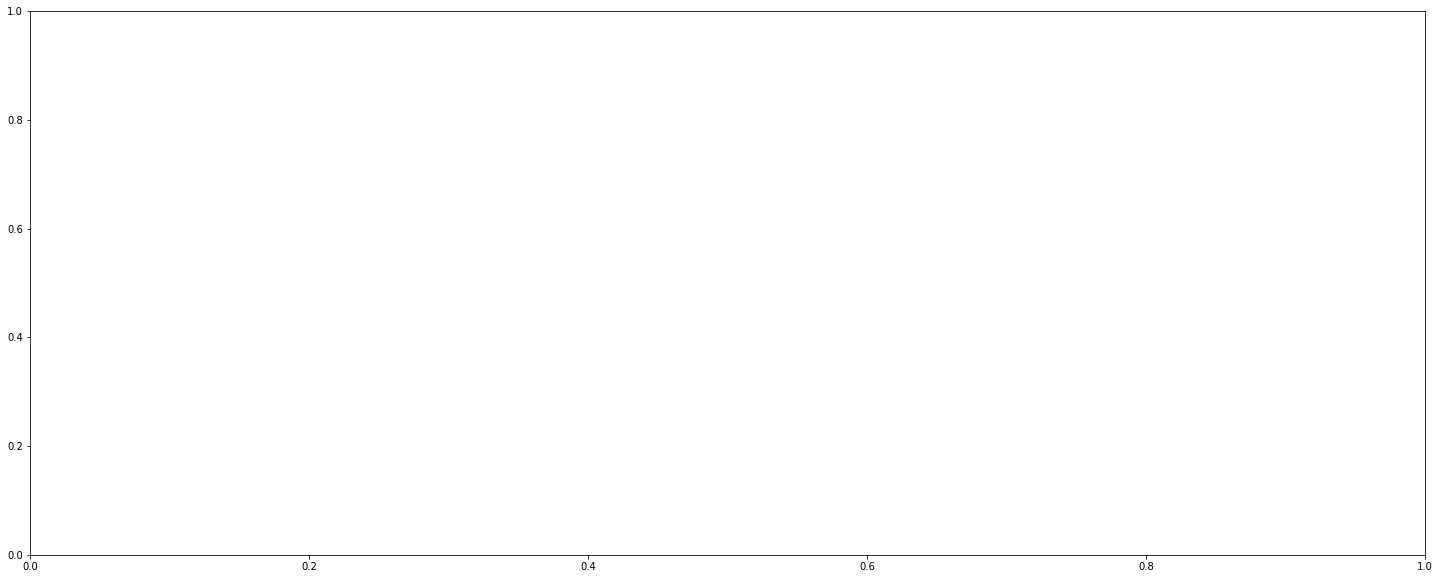

In [17]:
X= data[['Superplasticizer']]
Y = data[['Concrete_compressive_strength']]
from sklearn import tree
line = np.linspace(1,30,800).reshape(-1, 1)
fig , axes = plt.subplots(1,1, figsize= (25,10))
model = tree.DecisionTreeRegressor(criterion='mse', max_features='log2',max_depth=3, max_leaf_nodes=int(np.sqrt(np.array([860]))))
model.fit(X, Y)
yhat = model.predict(X.values)
ax.scatter(X, Y, c='blue', label = 'Data' )
ax.plot(line, model.predict(line), c = 'red', label = 'Prediction')
ax.legend()
ax.set_title('Regression for DEcision-tree')
print('MSE:', mean_squared_error(yhat, Y.values))
print('MAE:', 100- mean_absolute_percentage_error(yhat, Y.values)*100)
print('R2_Score:', r2_score(yhat, Y.values))

MSE: 185.93688692884402
MAE: 99.67259506282305
R2_score: -1.0020795289678261


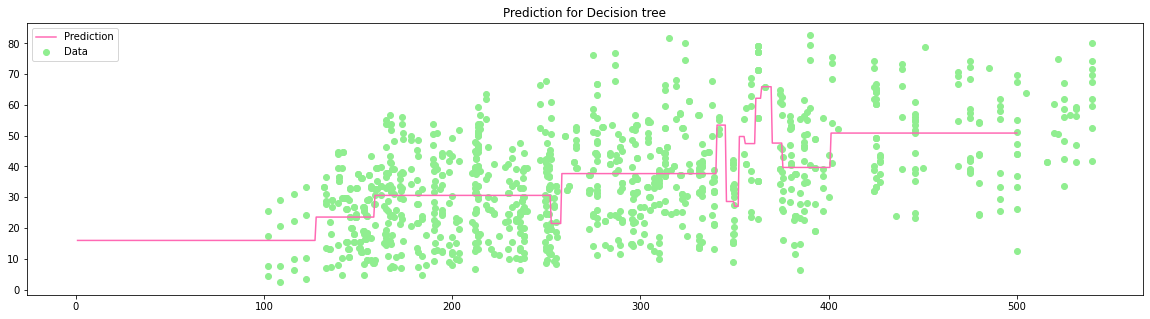

In [13]:
from sklearn import tree
X = data[['Cement']]
Y = data[['Concrete_compressive_strength']]
line = np.linspace(1,500,800).reshape(-1,1)
fig, axes = plt.subplots(1,1, figsize = (20,5))
dt_model = tree.DecisionTreeRegressor(criterion='mse',max_features='log2', max_depth= 4, max_leaf_nodes=int(np.sqrt(np.array([860]))))
dt_model.fit(X,Y)
yhat = dt_model.predict(X.values)


axes.scatter(X, Y, c = 'lightgreen', label ='Data')
axes.plot(line, dt_model.predict(line), c = 'hotpink', label = 'Prediction')
axes.legend()
axes.set_title('Prediction for Decision tree')
print('MSE:', mean_squared_error(yhat,Y.values))
print('MAE:', 100 - mean_absolute_percentage_error(yhat, Y.values))
print('R2_score:', r2_score(yhat,Y.values))

Random Forest Regressor

MSE: 122.30420537945463
MAE: 99.73545600755092
R2_score: 0.19265930952685273


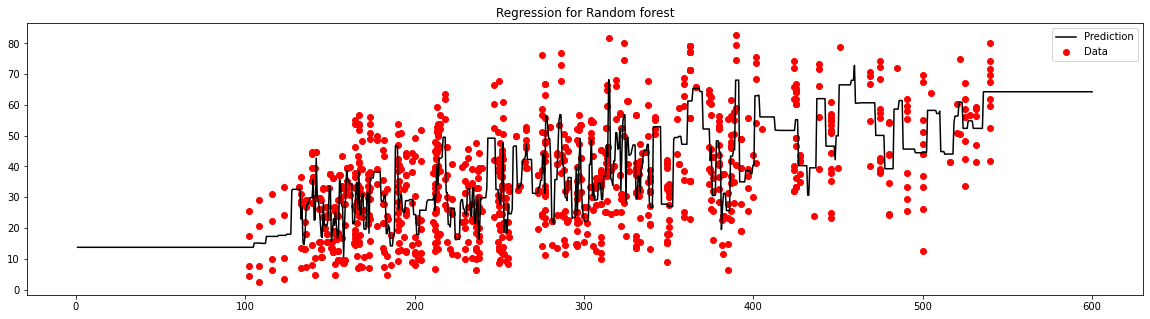

In [14]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
xtrain = data[['Cement']]
ytrain = data[['Concrete_compressive_strength']].values.ravel()
xtest = data[['Cement']]
ytest = data[['Concrete_compressive_strength']].values.ravel()
line = np.linspace(1,600,1000).reshape(-1,1)
fig, axes = plt.subplots(1,1, figsize=(20,5))
rf_model = RandomForestRegressor(random_state=0, n_estimators=100)
rf_model.fit(xtrain, ytrain)
yhat = rf_model.predict(xtest)
axes.scatter(xtrain, ytrain, c='red', label='Data')
axes.plot(line, rf_model.predict(line), c= 'black', label= 'Prediction')
axes.legend()
axes.set_title('Regression for Random forest')
print('MSE:', mean_squared_error(yhat,ytest))
print('MAE:', 100 - mean_absolute_percentage_error(yhat, ytest))
print('R2_score:', r2_score(yhat,ytest))


MSE: 177.578722494308
MAE: 99.67869281126823
R2_score: -0.8336621158806934


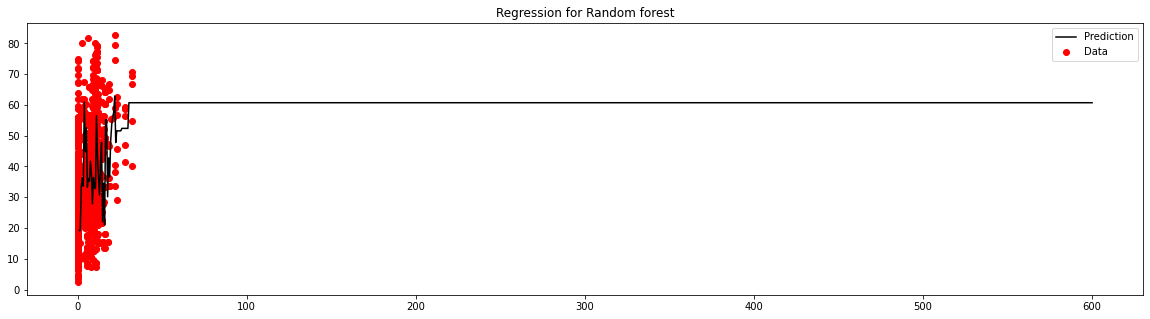

In [15]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
xtrain = data[['Superplasticizer']]
ytrain = data[['Concrete_compressive_strength']].values.ravel()
xtest = data[['Superplasticizer']]
ytest = data[['Concrete_compressive_strength']].values.ravel()
line = np.linspace(1,600,1000).reshape(-1,1)
fig, axes = plt.subplots(1,1, figsize=(20,5))
rf_model = RandomForestRegressor(random_state=0, n_estimators=100)
rf_model.fit(xtrain, ytrain)
yhat = rf_model.predict(xtest)
axes.scatter(xtrain, ytrain, c='red', label='Data')
axes.plot(line, rf_model.predict(line), c= 'black', label= 'Prediction')
axes.legend()
axes.set_title('Regression for Random forest')
print('MSE:', mean_squared_error(yhat,ytest))
print('MAE:', 100 - mean_absolute_percentage_error(yhat, ytest))
print('R2_score:', r2_score(yhat,ytest))


mse: 172.06632572954726
mae: 68.80445209366997
r2_score: -0.6608855635048416


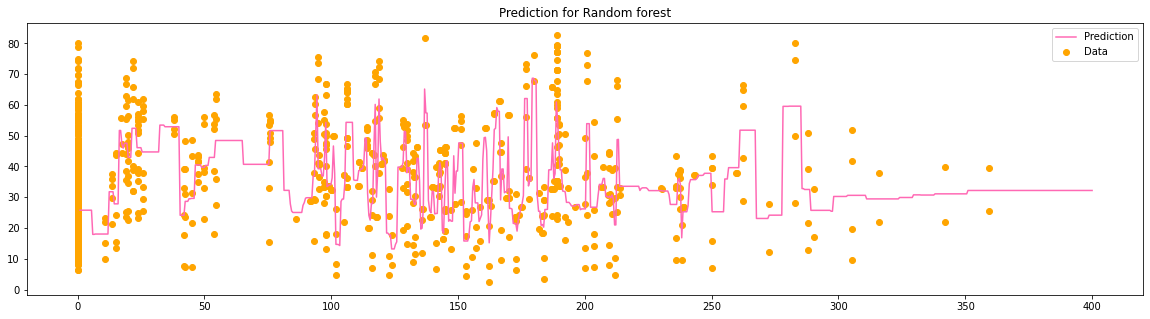

In [16]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
xtrain = data[['Blast_Furnace_Slag']]
ytrain = data[['Concrete_compressive_strength']].values.ravel()
xtest = data[['Blast_Furnace_Slag']]
ytest = data[['Concrete_compressive_strength']].values.ravel()
line = np.linspace(1,400,800).reshape(-1,1)
fig, axes = plt.subplots(1,1, figsize = (20,5))
rf_model = RandomForestRegressor(n_estimators=150, random_state=1 )
rf_model.fit(xtrain, ytrain)
yhat = rf_model.predict(xtest.values)
axes.scatter(xtrain, ytrain, c='orange', label='Data')
axes.plot(line, rf_model.predict(line), c= 'hotpink', label = 'Prediction')
axes.legend()
axes.set_title('Prediction for Random forest')
print('mse:', mean_squared_error(yhat, ytest))
print('mae:',100 - mean_absolute_percentage_error(yhat,ytest)*100)
print('r2_score:', r2_score(yhat, ytest))


